### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_values = data.isnull().sum()

missing_values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [193]:
data['car'].value_counts(dropna=False)

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

In [6]:
data['Bar'].value_counts(dropna=False)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64

In [7]:
data['CoffeeHouse'].value_counts(dropna=False)

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [194]:
data['Restaurant20To50'].value_counts(dropna=False) 

data['Bar'].replace({'less1': 'never', pd.NA: 'never'}, inplace=True)
data = data.dropna(subset=['Bar', 'CoffeeHouse'])



Drop the Car column as this column does not add any value

Many columns have neve, less1, and NaN which basically means the same. Replace less1 and NaN to never.

4. What proportion of the total observations chose to accept the coupon? 



In [195]:
total_entries = len(data)
accepted_coupon_count = data['Y'].sum()
accepted_coupon_portion = (accepted_coupon_count / total_entries) * 100

accepted_coupon_portion

56.950348921151836

5. Use a bar plot to visualize the `coupon` column.

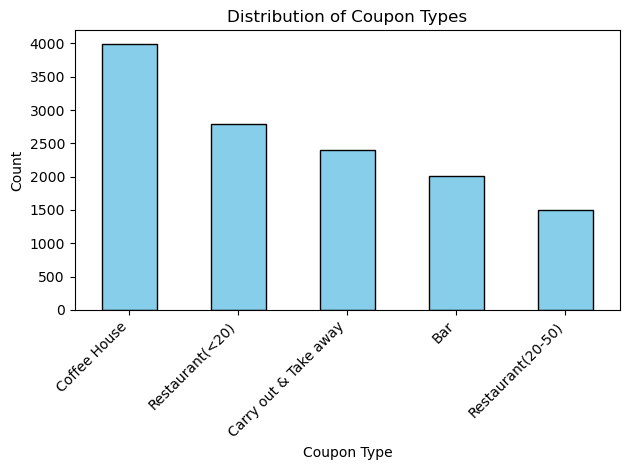

In [12]:
coupon_counts = data['coupon'].value_counts()
coupon_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

6. Use a histogram to visualize the temperature column.

80    6528
55    3840
30    2316
Name: temperature, dtype: int64


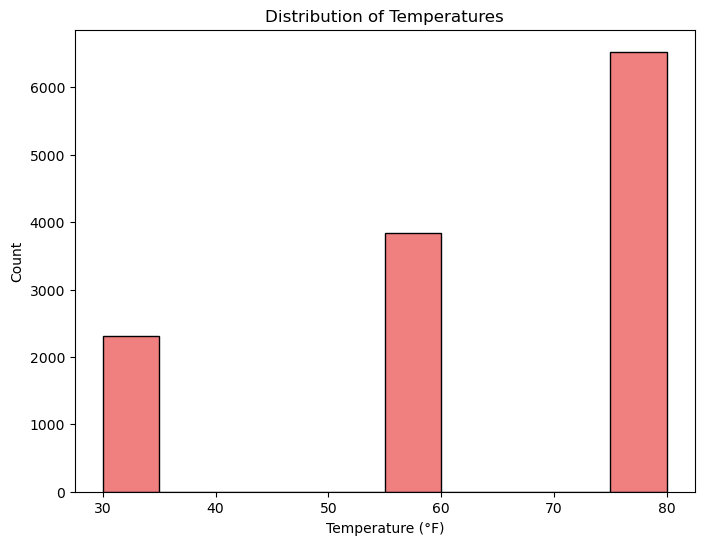

In [13]:
temperature_value_counts = data['temperature'].value_counts()

print(temperature_value_counts)

plt.figure(figsize=(8, 6))
plt.hist(data['temperature'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [196]:
bar_coupons_df = data[data['coupon'] == 'Bar']

bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [197]:
bar_coupon_acceptance_rate = bar_coupons_df['Y'].mean()

bar_coupon_acceptance_rate

0.4115267947421638

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [198]:
bar_visits_3_or_fewer = bar_coupons_df[bar_coupons_df['Bar'].isin(['never', '1~3'])]
bar_visits_more_than_3 = bar_coupons_df[bar_coupons_df['Bar'].isin(['4~8', 'gt8'])]

acceptance_rate_3_or_fewer_bar_coupons = bar_visits_3_or_fewer['Y'].mean()
acceptance_rate_more_than_3_bar_coupons = bar_visits_more_than_3['Y'].mean()

acceptance_rate_3_or_fewer_bar_coupons, acceptance_rate_more_than_3_bar_coupons


(0.372615039281706, 0.7653061224489796)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [199]:
bar_coupons_df['age'].replace({'21': '21 to 25', '26':'26 to 30', '31': 'etc', '50plus': 'etc', '36': 'etc', '41': 'etc', '46': 'etc'}, inplace=True)
bar_more_than_once_df = bar_coupons_df.query("Bar in ['1~3', '4~8', 'gt8']")

over_25_group = bar_more_than_once_df.query("age in ['26 to 30','etc']")
below_25_group = bar_more_than_once_df.query("age in ['21 to 25']")
acceptance_rate_over_25_group = over_25_group['Y'].mean()
acceptance_rate_below_25_group = below_25_group['Y'].mean()

acceptance_rate_over_25_group, acceptance_rate_below_25_group


/var/folders/zr/lmd2qzhx7vnfnj32rpvprg740000gn/T/ipykernel_51876/928217488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['age'].replace({'21': '21 to 25', '26':'26 to 30', '31': 'etc', '50plus': 'etc', '36': 'etc', '41': 'etc', '46': 'etc'}, inplace=True)


(0.6932367149758454, 0.6867469879518072)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [200]:
specific_group_for_q5 = bar_more_than_once_df.query(('occupation != "Farming Fishing & Forestry"') and ('passanger != "Kid(s)"'))

specific_group_for_q5['Y'].mean()


0.7106227106227107

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [201]:
acceptance_rate_no_kids_widowed = bar_more_than_once_df.query("(passanger not in ['Kid(s)', 'Alone']) & (maritalStatus != 'Widowed')")['Y'].mean()
acceptance_rate_under_30 = bar_more_than_once_df.query("age != 'etc'")['Y'].mean()
acceptance_rate_cheap_restaurant_and_income_less_than_50k = bar_more_than_once_df.query("(RestaurantLessThan20 in ['4~8', 'gt8']) & (income in ['$12500 - $24999','$25000 - $37499', '$37500 - $49999', 'Less than $12500'])")['Y'].mean()

acceptance_rate_no_kids_widowed, acceptance_rate_under_30, acceptance_rate_cheap_restaurant_and_income_less_than_50k

(0.7150259067357513, 0.7192982456140351, 0.7716535433070866)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From the data, I found that about 41% of people accept Bar coupons.

But here's something interesting: People who visit bars more than three times a month are more likely to accept these coupons. In fact, 76% of them do, which is way higher than the average.

Looking more closely, I noticed a few things:
- Drivers with passengers (but not kids) often take the coupon.
- Drivers who like cheaper restaurants and earn less than $50K a year also say yes to the coupon more.

In conclusion, if we want to get a lot of people (more than 70%) to take our coupons, we should give them to:
1. Drivers with friends or family (but not kids) in the car.
2. Younger drivers, under 30 years old.
3. Drivers who like cheaper places to eat and has income less than 50k.
4. People who go to bars a lot, more than three times a month.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [202]:
coffee_coupon_df = data[data['coupon'] == 'Coffee House']

coffee_coupon_df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [206]:
coffee_coupon_acceptance_rate = coffee_coupon_df['Y'].mean()

coffee_coupon_acceptance_rate

0.5

In [204]:
female_group_rate = coffee_coupon_df.query("gender == 'Female'")['Y'].mean()
male_group_rate = coffee_coupon_df.query("gender == 'Male'")['Y'].mean()

female_group_rate, male_group_rate

(0.49458661417322836, 0.5058139534883721)

In [205]:
data['destination'].value_counts()

no_urgent_destination_group_rate = coffee_coupon_df.query("destination == 'No Urgent Place'")['Y'].mean()
home_destination_group_rate = coffee_coupon_df.query("destination == 'Home'")['Y'].mean()
work_destination_group_rate = coffee_coupon_df.query("destination == 'Work'")['Y'].mean()

no_urgent_destination_group_rate, home_destination_group_rate, work_destination_group_rate


(0.581714827096163, 0.36443468715697036, 0.44567627494456763)

In [207]:
morning_group_rate = coffee_coupon_df.query("time in ['7AM', '10AM']")['Y'].mean()
afternoon_group_rate = coffee_coupon_df.query("time in ['2PM', '6PM']")['Y'].mean()
evening_group_rate = coffee_coupon_df.query("time in ['10PM']")['Y'].mean()

morning_group_rate, afternoon_group_rate, evening_group_rate

(0.5414798206278026, 0.4707792207792208, 0.4315068493150685)

In [208]:
occupation_acceptance_rates = coffee_coupon_df.groupby('occupation')['Y'].mean().reset_index()
sorted_occupation_acceptance_rates = occupation_acceptance_rates.sort_values(by='Y', ascending=False)


sorted_occupation_acceptance_rates

,occupation,Y
10,Healthcare Practitioners & Technical,0.760563
2,Building & Grounds Cleaning & Maintenance,0.727273
22,Student,0.625251
23,Transportation & Material Moving,0.618421
11,Healthcare Support,0.615385
12,Installation Maintenance & Repair,0.568182
0,Architecture & Engineering,0.555556
8,Farming Fishing & Forestry,0.545455
24,Unemployed,0.539007
1,Arts Design Entertainment Sports & Media,0.507177


In [209]:
education_acceptance_rates = coffee_coupon_df.groupby('education')['Y'].mean().reset_index()

sorted_education_acceptance_rates = education_acceptance_rates.sort_values(by='Y', ascending=False)

sorted_education_acceptance_rates

,education,Y
4,Some High School,0.607143
3,High School Graduate,0.538182
5,Some college - no degree,0.519586
0,Associates degree,0.517647
2,Graduate degree (Masters or Doctorate),0.510924
1,Bachelors degree,0.460615


In [210]:
passenger_acceptance_rates = coffee_coupon_df.groupby('passanger')['Y'].mean().reset_index()
sorted_passenger_acceptance_rates = passenger_acceptance_rates.sort_values(by='Y', ascending=False)

sorted_passenger_acceptance_rates

,passanger,Y
1,Friend(s),0.599170
3,Partner,0.572881
2,Kid(s),0.482759
0,Alone,0.438091


The data shows that nearly half of the people (about 49.92%) accept coffee coupons.
Men are slightly more likely to accept them, by a small 1.4% more than women.
When people are driving home, fewer of them (only 36%) accept the coupon.
People who work in "Healthcare" or "Cleaning & Maintenance" jobs really like the coffee coupon, accepting it 74% and 72% of the time. Students also like it, accepting 62% of the time.
Lastly, drivers with friends or a partner are more likely to accept the coffee coupon than those who are driving alone or with kids.